In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/blocks.csv", index_col = 0)

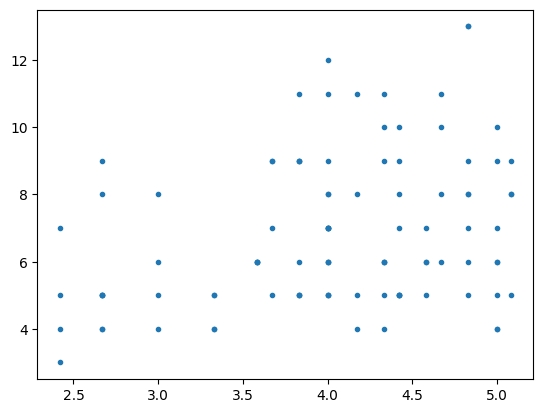

In [2]:
plt.plot(df["Age"], df["Number"], ".")

Vamos a usar Poisson, porque es una cuenta (contamos bloques)

### b)
 Ajustar el MLG (Poisson)

In [3]:
intercept = np.ones_like(df["Age"])
X_intercept = np.column_stack([intercept, df["Age"]])
Y = df["Number"]

$y = Poisson(\mu)$  
$\log(\mu) = \beta_0 + \beta_1 x$  
$ \rightarrow \mu = \exp(\vec{X} \times \vec{\beta})$  
$y \rightarrow$ bloques  
$x \rightarrow$ edad  

$L(y,\mu) = \prod_{i=1}^{n} \frac{1}{y!}e^{y\log\mu - \mu}$  

$l(y,\mu) = \sum_{i=1}^{n} y\log\mu - \mu$

In [4]:
from scipy.optimize import minimize

def neg_log_likelihood(beta, X, Y):
    mu = np.exp(X @ beta)
    return - np.sum(Y*np.log(mu) - mu)

initial_beta = [0,0]
result_poisson = minimize(neg_log_likelihood, initial_beta, args = (X_intercept, Y))

In [5]:
beta_0, beta_1 = result_poisson.x

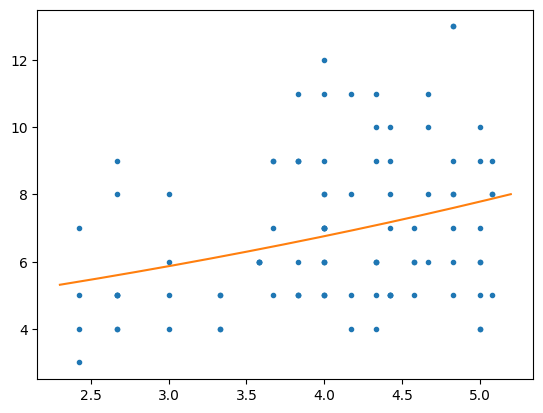

In [6]:
X_estimacion = np.linspace(2.3, 5.2, 100000) # rango de edades
mu_pred = np.exp(beta_0 + beta_1 * X_estimacion)

plt.plot(df["Age"], Y, ".")
plt.plot(X_estimacion, mu_pred)

### Probando

In [7]:
df.head()

,Child,Number,Time,Trial,Shape,Age
0,A,11,30.0,1,Cube,4.67
1,B,9,19.0,1,Cube,5.00
2,C,8,18.6,1,Cube,4.42
3,D,9,23.0,1,Cube,4.33
4,E,10,29.0,1,Cube,4.33


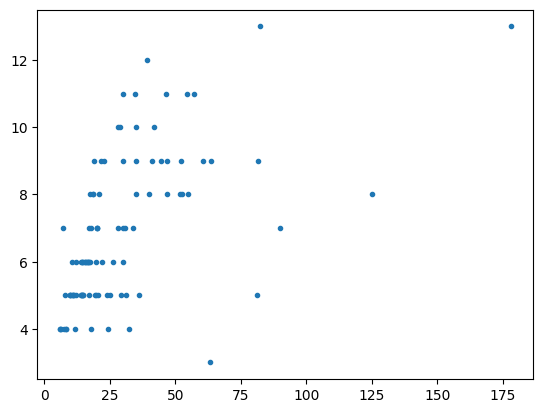

In [8]:
plt.plot(df["Time"], df["Number"], ".")

Poisson

In [40]:
intercept = np.ones_like(df["Time"])
X_intercept = np.column_stack([intercept, df["Time"]])
Y = df["Number"]

In [41]:
initial_beta = [1,1]
result_poisson = minimize(neg_log_likelihood, initial_beta, args = (X_intercept, Y))

In [42]:
beta_0, beta_1 = result_poisson.x

In [43]:
beta_0, beta_1

(1.738428425752621, 0.005713670086680314)

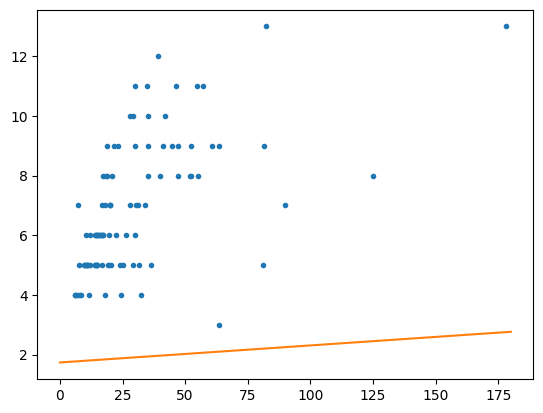

In [44]:
X_estimacion = np.linspace(0, 180, 100000) # rango de edades
mu_pred = np.exp(beta_0 + beta_1 * X_estimacion)

plt.plot(df["Time"], Y, ".")
plt.plot(X_estimacion, mu_pred)

probar con Gamma

por lo que dice chat gpt es Gamma

$L(y,\mu, \alpha) = \prod_{i=1}^{n} \frac{y_i^{\alpha - 1}\alpha^\alpha}{\gamma(\alpha)}\exp[\frac{\frac{-y}{\mu} + \log(\frac{1}{\mu})}{\frac{1}{\alpha}}]$  

$l(y,\mu) = \sum_{i=1}^{n} \alpha(-\frac{y}{\mu}-\log(\mu))$

prueba con $g(\mu) = log(\mu)$ (no es la canonica)

In [45]:
from scipy.special import gamma, gammaln
def neg_log_likelihood_gamma(beta, X, Y):
    mu = np.exp(X @ beta)
    log_likelihood = np.sum(-Y/mu -  np.log(mu))
    return -log_likelihood

initial_beta = [1,1]
result_gamma = minimize(neg_log_likelihood_gamma, initial_beta, args = (X_intercept, Y))

result_gamma.x

array([1.69839409, 0.00697942])

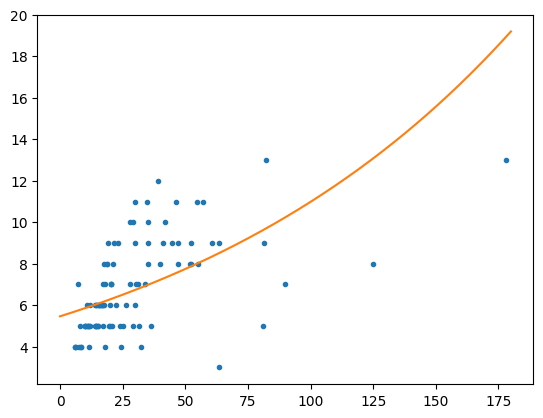

In [46]:
beta_0, beta_1 = result_gamma.x

X_estimacion = np.linspace(0, 180, 100000)
mu_pred = np.exp(beta_0 + beta_1 * X_estimacion)

plt.plot(df["Time"], Y, ".")
plt.plot(X_estimacion, mu_pred)

NO entiendo nadaaaaaaaaa

normal

In [49]:
def neg_log_likelihood_normal(beta, X, Y):
    mu = np.exp(X @ beta)
    log_likelihood = np.sum(np.log(Y*mu - (mu**2)/2))
    return -log_likelihood

initial_beta = [0,0]
result_normal = minimize(neg_log_likelihood_normal, initial_beta, args = (X_intercept, Y))

result_normal.x

array([1.60833133, 0.00578695])

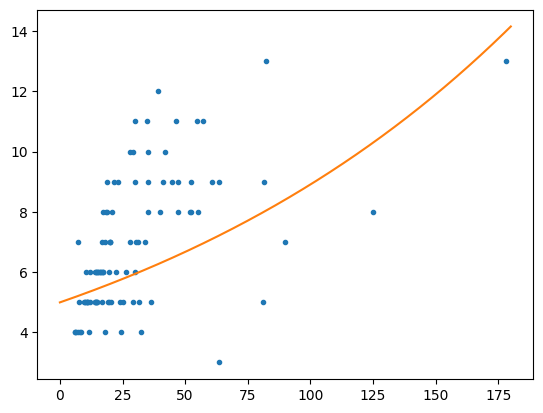

In [51]:
beta_0, beta_1 = result_normal.x

X_estimacion = np.linspace(0, 180, 100000)
mu_pred = np.exp(beta_0 + beta_1 * X_estimacion)

plt.plot(df["Time"], Y, ".")
plt.plot(X_estimacion, mu_pred)